In [77]:
import math
import numpy as np 
import matplotlib.pyplot as plt


alpha = 2
v = 1


def tMSD_1d(x, L):
    """
    Function to calculate the tMSD.
    
    Parameters
    ==========
    x : Trajectory (x component).
    L : Indicates the maximum delay (L * dt) considered.
    """

    tmsd = np.zeros(L)
    
    nelem = np.size(x)

    for n in range(L):
        Nmax = nelem - n
        dx = x[n:nelem] -  x[0: Nmax]
        tmsd[n] += np.mean(dx ** 2)

    return tmsd

def eMSD_1d(x):
    """
    Function to calculate the eMSD.
    
    Parameters
    ==========
    x : Trajectories: x[n_traj, i], bidimensional array.
    """

    N_traj, N_steps = x.shape
    
    # emsd = np.zeros(N_steps)
    
    emsd = np.mean(
        (x - np.repeat(x[:, 0].reshape(N_traj, 1), N_steps, axis=1)) ** 2,
        axis=0
    )
    
    return emsd

def regularize(x_nu, t_nu, t):
    """
    Function to regularize a time non-uniformly sampled trajectory.
    
    Parameters
    ==========
    x_nu : Trajectory (x component) non-uniformly sampled in time.
    t_nu : Time (non-uniform sampling).
    t : Time (wanted sampling).
    """
    x = np.zeros(np.size(t))
    m = np.diff(x_nu) / np.diff(t_nu)  # Slopes of the different increments.

    s = 0  # Position in the wanted trajectory.
    for i in range(np.size(t_nu) - 1):
        
        # Select the spots in x (wanted trajectory) to set.
        s_end = np.where(t < t_nu[i+1])[0][-1]                 

        # Assign the values of the segment.
        x[s:s_end + 1] = x_nu[i] + m[i] * (t[s:s_end + 1]-t_nu[i]) 
        
        # Update the position in the wanted trajectory.
        s = s_end + 1                                           
        
    return x

def normalize(x_nn):
    """
    Function to normalize a regular trajectory.
    
    Parameters
    ==========
    x_nn : Trajectory (x component) non-nrmalized.
    """
    x = np.zeros(np.size(x_nn))
    dx = x_nn[1:] - x_nn[0:-1]
    
    sigma = np.std(dx**2)
    
    x = x_nn[0] + np.cumsum(dx / sigma)
    
    mu = np.mean(x)
    
    x -= mu
        
    return x



10001
10001
10000


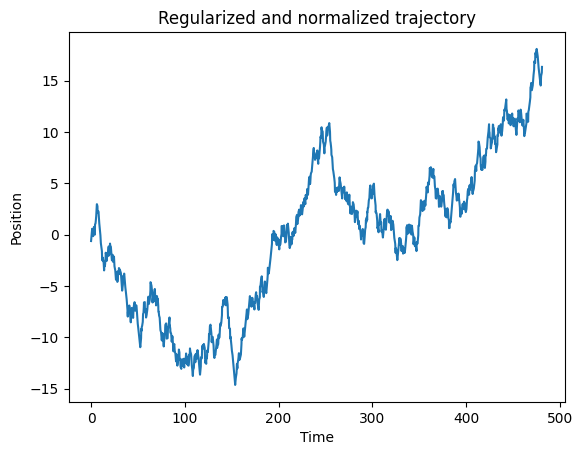

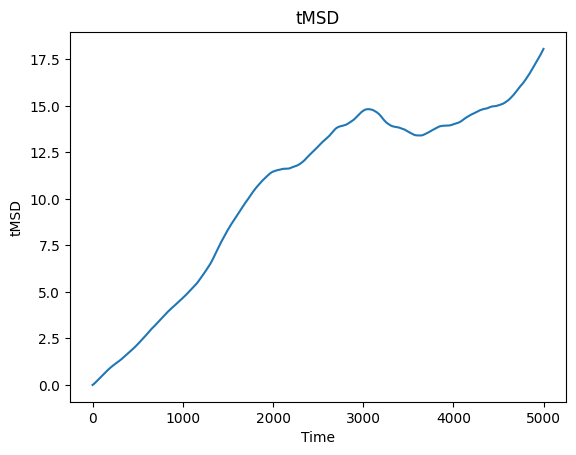

In [ ]:
# Simulation A L´evy walk (LW) trajectory
# Parameters
N = 1000
total_interval = 10001
N_traj = 100

# Generate the first list with elements 1 or -1, each with 50% probability
move_n = np.random.choice([1, -1], size=N, p=[0.5, 0.5])

# Generate the second list with elements uniformly distributed between 0 and 1
delta_t = np.random.uniform(0, 1, size=N)

t_seq = np.cumsum(delta_t)

move_t = move_n * v * delta_t

x = np.zeros(N)

x[1:] = (np.cumsum(move_t))[:-1]

# Regularize the trajectory

t = np.linspace(0, np.max(t_seq), total_interval)

print(len(t))


x_reg = regularize(x, t_seq, t)
print(len(x_reg))
x_nor = normalize(x_reg)
print(len(x_nor))

# Calculate the eMSD and tMSD
#eMSD = eMSD_1d(x_nor)
tMSD = tMSD_1d(x_nor, int((total_interval-2)/2))
t = t[:total_interval-2]
x_nor = x_nor[:total_interval-2]

# plot the results
import matplotlib.pyplot as plt

plt.figure()
plt.plot(t, x_nor)
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Regularized and normalized trajectory')
plt.show()

# plt.figure()
# plt.plot(eMSD)
# plt.xlabel('Time')
# plt.ylabel('eMSD')
# plt.title('eMSD')
# plt.show()

plt.plot(tMSD)
plt.xlabel('Time')
plt.ylabel('tMSD')
plt.title('tMSD')
plt.show()




2069.9635690463992
3879.409490152999
1742.747474921238
1301.2144620500333
2426.735576434495


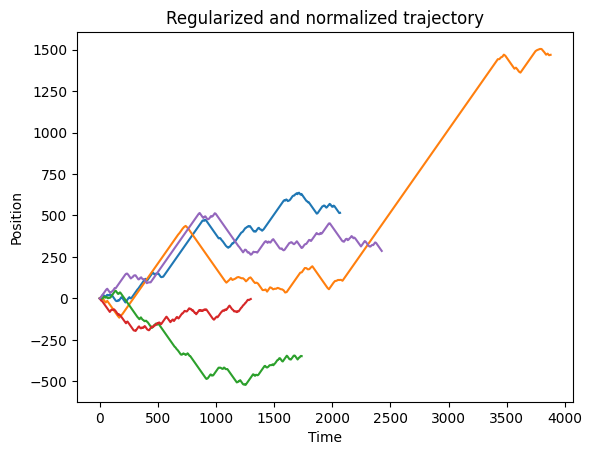

[  0.          -1.57523724  60.09790075  57.28571124  54.61048955
  45.76331331  43.72096335  42.06724216  33.58142279  32.32494756
  31.10054464  40.48438617  43.31484594  40.36140904  41.96949049
  64.44388612  62.72299143  59.8847505  144.74442271 147.2518263
 149.29606365 148.1400622  149.31903153 147.33682326 145.96548341
 151.39250642 150.15823645 123.7436584  121.56112247 120.14013589
 118.91249699 119.95701609 124.17490236 128.93898424 127.63603625
 126.48346197 142.20076102 138.20191972 139.40180055 142.20795762
 140.07235597 120.7851518  112.62002726 111.47997433 113.24589128
 114.91991584 129.78618761 127.6962678  122.46697861 120.32486078
 113.31615166 119.91789963  90.17899949  95.09726294  99.46344445
 100.47483372  98.43246622  96.77057547  94.92377675  96.01500399
  97.08639     99.54843411  96.41618286  97.67406175  94.35033065
  96.50192641  98.07315212  99.14253674 516.92402139 515.01977219
 486.04387163 483.76864831 497.93317413 495.69931309 494.64218795
 493.027521

In [ ]:
#dt = 1e-3  # Time step [s]. For viscous simulation.
v = 1
alpha = 2
# Coefficients for the finite difference solution.
#c_noise = np.sqrt(2 * D * dt)
# Simulation for tMSD. Long trajectory with 1e+6 points.
N_steps_t = 300


  # Total time [s].

# Simulation for eMSD. 1e+3 trajectories with 1e+3 points each.
#N_steps_e = int(1e+2)
#duration_e = N_steps_e * dt  # Total time [s].
#N_traj = 100

x0 = 0  # Initial position [m].
N=0
plt.figure()
while N <5:
    x_t = np.zeros(N_steps_t)
    x_t[0] = x0
    

    time_seq_t = np.zeros(N_steps_t)
    delta_t = np.random.uniform(0, 1, size=N_steps_t-1)
    delta_t = delta_t ** (-1 / (3-alpha))                 ##########dynamic respect to time interval
    time_seq_t[1:] = np.cumsum(delta_t)[:N_steps_t-1]

    duration_t = np.max(time_seq_t)


    rn_t = np.random.choice([1, -1], size=N_steps_t-1, p=[0.5, 0.5])
        


    move_t = rn_t * v * delta_t                        ########## dynamics of each move
    x_t[1:] = np.cumsum(move_t)[:N_steps_t - 1]

    # for n in range(N_steps_t - 1):
    #     x_t[n + 1] = x_t[n] + v * rn_t[n]* delta_t[n]

    # regularize the trajectory

    t = np.linspace(0, time_seq_t[N_steps_t-2], N_steps_t)

    x_reg = regularize(x_t, time_seq_t, t)            ##########regularize the trajectory

    #x_nor = normalize(x_reg)

    t = t[:len(x_reg)]

    # plot the results
    print(time_seq_t[-1])

    
    plt.plot(t, x_reg)
    #plt.plot(time_seq_t, x_t)
    

    # Calculate tMSD
    #tmsd = tMSD_1d(x_t, L=N_steps_t)  # Note: L=N_steps_e.

    # plot the results

    # print(len(tmsd))

    # plt.figure()
    # plt.plot(tmsd)
    # plt.xlabel('Time')
    # plt.ylabel('tMSD')
    # plt.title('tMSD')
    # plt.show()
    N+=1
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Regularized and normalized trajectory')
plt.show()
# Define the time dependence for tMSD (and later eMSD)
#t_delay = dt * np.arange(N_steps_e)

print(x_t)
print(time_seq_t)
print(move_t)
print(delta_t)

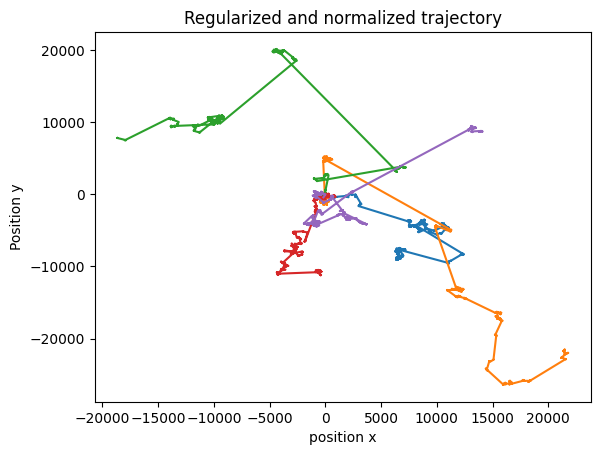

In [ ]:
# 2-d

alpha = 2
v = 1
n = 0
plt.figure()

while n < 5:
    x_t = np.zeros(N_steps_t)
    y_t = np.zeros(N_steps_t)

    x_t[0] = 0
    y_t[0] = 0

    delta_t = np.random.uniform(0, 1, size=N_steps_t)
    delta_t = delta_t ** (-1 / (3-alpha)) ##########################################dynamic respect to time interval
    time_seq_t = np.cumsum(delta_t)

    omega_t = np.random.uniform(-np.pi, np.pi, size=N_steps_t)
    phi = np.cumsum(omega_t)           ##########################################dynamic of the angle

    x_move_t = v * np.cos(phi) * delta_t
    y_move_t = v * np.sin(phi) * delta_t ##########################################dynamics of each move

    x_t[1:] = np.cumsum(x_move_t)[:N_steps_t - 1]
    y_t[1:] = np.cumsum(y_move_t)[:N_steps_t - 1]

    # regularize the trajectory

    t = np.linspace(0, time_seq_t[N_steps_t-2], N_steps_t)

    x_reg = regularize(x_t, time_seq_t, t)
    y_reg = regularize(y_t, time_seq_t, t)##########################################regularize the trajectory

    # plot the results

    plt.plot(x_reg, y_reg)
    n =n+1
plt.xlabel('position x')
plt.ylabel('Position y')
plt.title('Regularized and normalized trajectory')
plt.show()



[[ 0.          3.25039251  4.85989518  8.5097718  16.38773184 17.58592365
  18.73897885 19.7610924  23.91556729 26.66110888]
 [ 0.          2.1796965   4.75210927  5.81663231 26.55039738 34.33111708
  39.06293971 41.04986838 43.34594875 44.73917853]
 [ 0.          5.26724675 11.14530179 12.63125247 18.02657728 19.33195099
  20.63336139 23.80038908 26.61761854 27.67417358]
 [ 0.          1.20817039  3.51498618  4.55419524  5.60201593  6.84758079
  14.19902302 16.39396597 18.56817789 20.04937089]
 [ 0.          1.0754406   5.48589283  7.20289876  8.21225815 14.14975572
  15.3526947  17.18427781 31.59960392 32.9026117 ]
 [ 0.          4.02516459  5.48897426 20.9677743  24.63573922 33.30175661
  36.52138461 79.12671128 86.45902301 88.93224056]
 [ 0.          1.17290852  4.93807553  5.94845399  7.10622788  8.13963147
   9.18028318 10.34616028 13.0374886  15.45341576]
 [ 0.          2.20633017  4.9302192   5.98163181 10.61238628 14.65446274
  21.90919249 23.38312135 29.90442978 32.26760034]


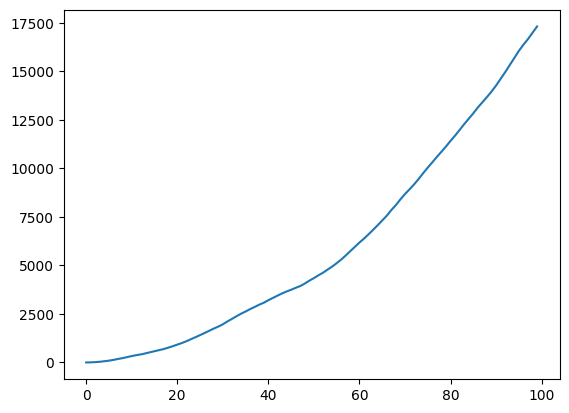

In [111]:
# calculate the eMSD for 1d

N_traj = 100

N_steps_e = int(1e+2)

x0 = 0  # Initial position [m].
N=0
plt.figure()

x_t = np.zeros((N_traj, N_steps_e))
x_t[:,0] = x0
# Generate long trajectory for time average.

time_seq_t = np.zeros((N_traj, N_steps_e))
delta_t = np.random.uniform(0, 1, size=(N_traj,N_steps_e-1))
delta_t = delta_t ** (-1 / (3-alpha))
time_seq_t[:,1:] = np.cumsum(delta_t,1)[:,:N_steps_e-1]

print(time_seq_t[0:10,0:10])


rn_t = np.random.choice([1, -1], size=(N_traj,N_steps_e-1), p=[0.5, 0.5])

move_t = rn_t * v * delta_t
x_t[:,1:] = np.cumsum(move_t,1)[:,:N_steps_e - 1]

# for n in range(N_steps_t - 1):
#     x_t[n + 1] = x_t[n] + v * rn_t[n]* delta_t[n]

# regularize the trajectory

t = np.linspace(0, np.min(time_seq_t[:,N_steps_e-2]), N_steps_e)

x_reg = np.zeros((N_traj, N_steps_e))

for i in range(N_traj):
    x_reg[i,:] = regularize(x_t[i,:], time_seq_t[i,:], t)

eMSD = eMSD_1d(x_reg)

print(len(eMSD))

# plot the results
plt.plot(eMSD)

